In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data/train.csv')

In [3]:
df_train = pd.DataFrame(columns=['trainNo','lineName', 'date', 'stopStation', 'firstDelay','planArrival', 'delayTime'])
for name,data in df.groupby(['trainNo','date','directionCode']):
    stopStation,delayTime,planArrival =[],[],[]
    before_delay=0
    for _,rows in data.iterrows():
        planArrival.append(rows['planArrival'])
        delayTime.append(rows['delayTime']-before_delay)
        before_delay=rows['delayTime']
        stopStation.append(rows['stopStation'])
    df_train = df_train.append([{'trainNo': rows['trainNo'],
                             'lineName':  rows['lineName'],
                             'date': data['date'][data.index[0]],
                            'firstDelay':data['delayTime'][data.index[0]],
                             'stopStation': stopStation,
                             'planArrival': planArrival,
                             'delayTime': delayTime,
                             }], ignore_index=True)

In [4]:
df_train.to_csv('data/df_train.csv')

In [5]:
df=pd.read_csv('data/test.csv')

In [6]:
df_test = pd.DataFrame(columns=['trainNo','lineName', 'date', 'stopStation', 'firstDelay','planArrival', 'delayTime','target','predict_len'])
for name,data in df.groupby(['trainNo','date','directionCode']):
    stopStation,delayTime,planArrival,target =[],[],[],[]
    before_delay=0
    for _,rows in data.iterrows():
        planArrival.append(rows['planArrival'])
        if rows['delayTime']==None:
            delayTime.append(0)
        else:
            delayTime.append(rows['delayTime']-before_delay)
            before_delay=rows['delayTime']
        stopStation.append(rows['stopStation'])
        target.append(rows['target'])
    df_test = df_test.append([{'trainNo': rows['trainNo'],
                             'lineName':  rows['lineName'],
                             'date': data['date'][data.index[0]],
                            'firstDelay':data['delayTime'][data.index[0]],
                             'stopStation': stopStation,
                             'planArrival': planArrival,
                             'delayTime': delayTime,
                             'target':target,
                             'predict_len':sum(target)
                             }], ignore_index=True)

In [7]:
df_test.to_csv('data/df_test.csv')

In [8]:
df_test=pd.read_csv('data/df_test.csv')

([], [])

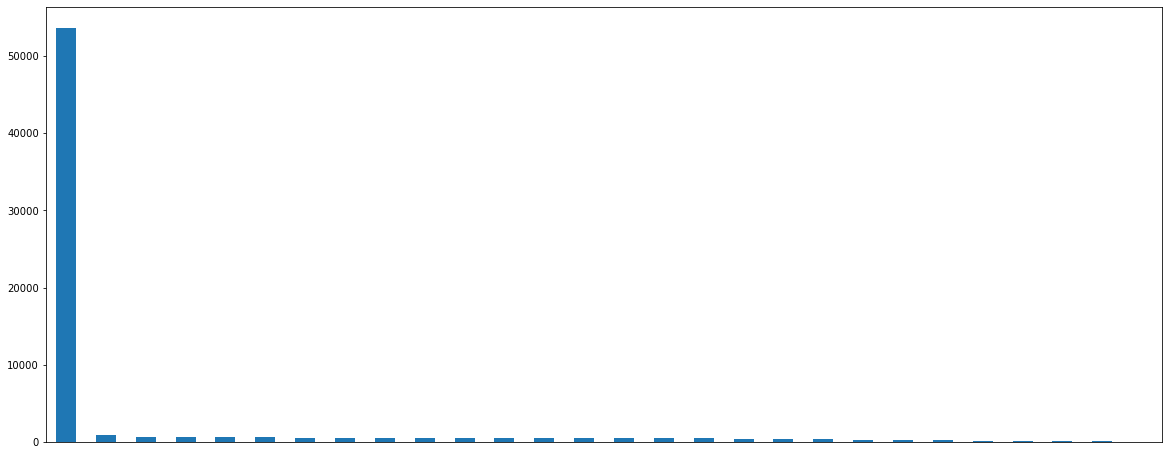

In [9]:
plt.subplots(figsize=(20,8))
df_test['predict_len'].value_counts().plot(kind='bar')
plt.xticks([])